# 🌳 Decision Tree Pruning

## Definition
**Pruning** is the process of reducing the size of a decision tree by removing parts of the tree that do not provide significant power to predict the target variable.  
It helps to:
- Prevent **overfitting** (memorizing noise in training data)
- Improve **generalization** on unseen data
- Simplify the tree for better **interpretability**

---

## 🧹 Types of Pruning

### 1. Pre-Pruning (Early Stopping)
- Stops the tree growth early, before it becomes too complex.
- Decision criteria can include:
  - `max_depth` (Maximum depth of the tree)
  - `min_samples_split` (Minimum samples required to split a node)
  - `min_samples_leaf` (Minimum samples required at a leaf node)
  - `max_leaf_nodes` (Limit on number of leaf nodes)

**Advantages:** Faster training, avoids deep overfitting trees.  
**Disadvantages:** Might stop too early and miss important patterns.

---

### 2. Post-Pruning (Cost Complexity Pruning)
- First grow the full tree.
- Then prune back nodes that provide little gain, based on a complexity parameter `ccp_alpha`.
- Also called **Weakest Link Pruning**.

**Steps:**
1. Grow a complete tree.
2. Calculate the cost-complexity measure for each subtree.
3. Prune nodes to minimize the total error plus a penalty for complexity.

**Advantages:** Usually leads to better model performance.  
**Disadvantages:** Slightly slower as full tree must be built first.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset

dataset = pd.read_csv('decision_tree_dataset.csv')
dataset.head(3)

,Age,Income,Student,Credit_rating,Buy
0,Middle_Aged,Medium,No,Fair,Yes
1,Youth,High,No,Excellent,No
2,Middle_Aged,Medium,No,Excellent,Yes


In [3]:
# check the null value
dataset.isnull().sum()

Age              0
Income           0
Student          0
Credit_rating    0
Buy              0
dtype: int64

## Encoding Data using Label Encoder

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
# now encode the dataset

encoding_map = {}  # dictionary to store mappings


for col in dataset.columns:
    dataset[col] = le.fit_transform(dataset[col])
    encoding_map[col] = dict(zip(le.classes_, le.transform(le.classes_)))


In [6]:
# Display the mappings
for col, mapping in encoding_map.items():
    print(f"\nEncoding for '{col}':")
    for k, v in mapping.items():
        print(f"  {k} ➝ {v}")


Encoding for 'Age':
  Middle_Aged ➝ 0
  Senior ➝ 1
  Youth ➝ 2

Encoding for 'Income':
  High ➝ 0
  Low ➝ 1
  Medium ➝ 2

Encoding for 'Student':
  No ➝ 0
  Yes ➝ 1

Encoding for 'Credit_rating':
  Excellent ➝ 0
  Fair ➝ 1

Encoding for 'Buy':
  No ➝ 0
  Yes ➝ 1


In [7]:
dataset.head(5)

,Age,Income,Student,Credit_rating,Buy
0,0,2,0,1,1
1,2,0,0,0,0
2,0,2,0,0,1
3,0,2,0,0,1
4,0,0,0,0,1


## Input and Output variable selection

In [8]:
x = dataset.iloc[:,:-1]
y = dataset['Buy']

## Train Test and Split

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Preparation and Training

In [12]:
from sklearn.tree import DecisionTreeClassifier

### Pre-Pruning

In [17]:
# Now setting the max_depth to increase the accuracy

dt = DecisionTreeClassifier(max_depth=4)

In [18]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [19]:
# check the accuracy 
dt.score(x_test, y_test)

0.8636363636363636

In [20]:
# check the accuracy of train

dt.score(x_train, y_train)

# if there is huge different between bot train and test score it mean your model is over fitted, then you need to do the Pruning.

0.8704545454545455

Before prediction convert your values to:

Encoding for 'Age':
  Middle_Aged ➝ 0
  Senior ➝ 1
  Youth ➝ 2

Encoding for 'Income':
  High ➝ 0
  Low ➝ 1
  Medium ➝ 2

Encoding for 'Student':
  No ➝ 0
  Yes ➝ 1

Encoding for 'Credit_rating':
  Excellent ➝ 0
  Fair ➝ 1

Encoding for 'Buy':
  No ➝ 0
  Yes ➝ 1

In [21]:
# now predict the data --> Youth,High,No,Excellent,No

dt.predict([[2,0,0,0]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## Plot the Tree

In [22]:
from sklearn.tree import plot_tree

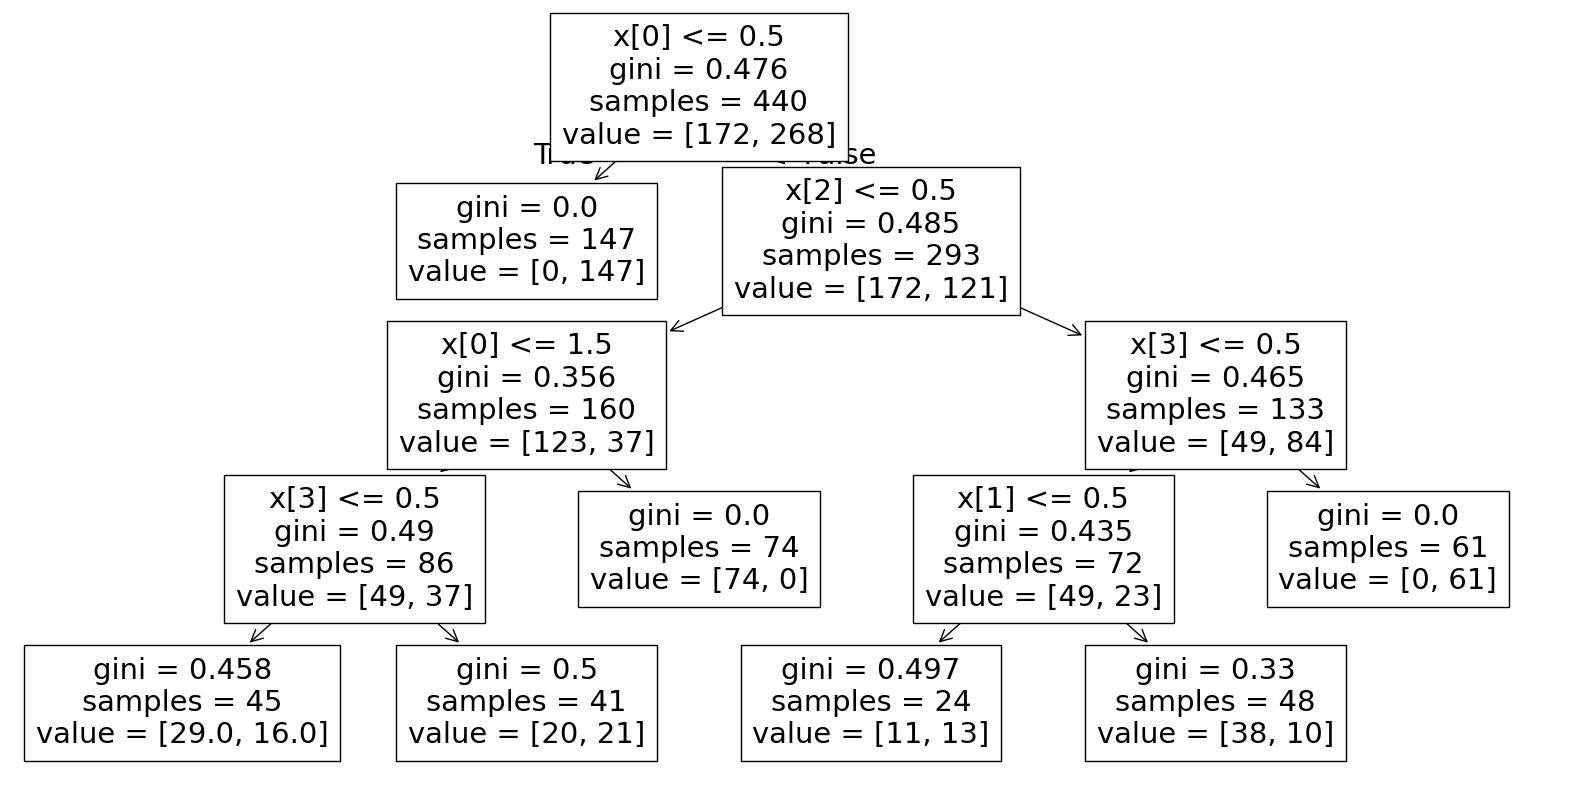

In [23]:
# plot the tree

plt.figure(figsize=(20, 10))
plot_tree(dt)
plt.show()

## Post Pruning

In [26]:

for i in range(1, 15):
    dt1 = DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train, y_train)
    print(dt1.score(x_test, y_test), dt1.score(x_train, y_train), i)

0.7454545454545455 0.725 1
0.7818181818181819 0.8045454545454546 2
0.8545454545454545 0.8636363636363636 3
0.8636363636363636 0.8704545454545455 4
0.8363636363636363 0.8795454545454545 5
0.8363636363636363 0.8795454545454545 6
0.8363636363636363 0.8795454545454545 7
0.8363636363636363 0.8795454545454545 8
0.8363636363636363 0.8795454545454545 9
0.8363636363636363 0.8795454545454545 10
0.8363636363636363 0.8795454545454545 11
0.8363636363636363 0.8795454545454545 12
0.8363636363636363 0.8795454545454545 13
0.8363636363636363 0.8795454545454545 14


### Now you could see that max_depth 4 is best.